In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import viz # curriculum viz example code

np.random.seed(123)

For the following problems, use python to simulate the problem and calculate an experimental probability, then compare that to the theoretical probability.

# 1
A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

What is the probability that no cars drive up in the noon hour?
What is the probability that 3 or more cars come through the drive through?
How likely is it that the drive through gets at least 1 car?

Text(0.5, 1.0, 'Poisson Distribution λ = 2')

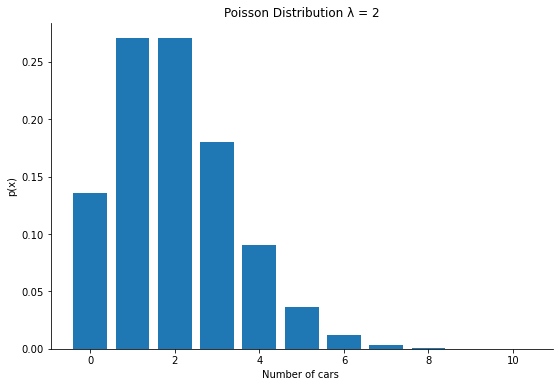

In [79]:
# poisson distrubution mean 2 
λ= 2
x = np.arange(0,11)
y = stats.poisson(λ).pmf(x)

plt.bar(x,y)
plt.xlabel('Number of cars ')
plt.ylabel('p(x)')
plt.title('Poisson Distribution λ = 2')

In [2]:
# no cars driven in noon 
stats.poisson(2).pmf(0)


0.1353352832366127

In [82]:
# 3 or more cares through drive through 
stats.poisson(2).sf(2)

0.32332358381693654

In [83]:
# at least 1 car 
stats.poisson(2).sf(0)

# or 1- stats.poisson(2).pmf(0)

0.8646647167633873

# 2 
Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

- What grade point average is required to be in the top 5% of the graduating class?
- What GPA constitutes the bottom 15% of the class?
- An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
- If I have a GPA of 3.5, what percentile am I in?

In [12]:
# stats.norm(μ, σ)
mean_of = 3
sd = 3 
gpa = stats.norm(3,.3)

In [85]:
# What grade point average is required to be in the top 5% of the graduating class?
gpa.isf(0.05)

3.4934560880854417

In [10]:
#What GPA constitutes the bottom 15% of the class?
gpa.ppf(0.15)

2.689069983151863

In [20]:
first_decile = gpa.ppf(0.1)
first_decile

2.6155345303366198

In [21]:
second_decile = gpa.ppf(0.2)
second_decile

2.7475136299281258

In [23]:
third_decile = gpa.ppf(0.3)
third_decile

2.842679846187588

In [26]:
# the third decile from the bottom of their class. Determine the range of the third decile
range = (second_decile, third_decile)
print( range) 

#Would a student with a 2.8 grade point average qualify for this scholarship
# yes 



(2.7475136299281258, 2.842679846187588)


In [86]:
# If I have a GPA of 3.5, what percentile am I in?

gpa.cdf(3.5)

0.9522096477271853

In [87]:
# using simulation '
(np.random.normal(3,0.3, 100000)<3.5).mean()

0.95189

# 3 
A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [14]:
# use stats.binom(trials, p) since its a bionomial 
p = 0.02 
trials = 4326
stats.binom(4326, 0.02).sf(96)

0.1397582363130086

In [15]:
# stats.binom(n_trials, p)
stats.binom(4326, 0.02).sf(97)

0.11781530585907925

In [91]:
# using simulation 

clicks = (np.random.choice([0,1], size = (10000, 4326), p = (0.98, 0.02)))
clicks 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [92]:
(clicks.sum(axis = 1) >= 98).mean()

0.117

In [95]:
# using poisson approx 

λ = trials  *p 


# 4 
You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

What is the probability that at least one of your first 60 answers is correct?

In [31]:
trials = 60
p = 0.01
stats.binom(60, 0.01).sf(0) # sf(0) --- probablity of getting at least one question correct 

0.4528433576092388

In [98]:
# by simulation 

(np.random.choice([0,1], size= (100000, 60), p =(0.99, 0.01)))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [99]:
(np.random.choice([0,1], size= (100000, 60), p =(0.99, 0.01))).sum 

<function ndarray.sum>

# 5 
The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [ ]:
# 3% chance 1 student cleans 
# about 90% of 3 cohorts of 22 students visited = 90% of 22 = 19.8
# liklyhood of cleaned up each day
# how likely it goes 2 days without cleaned up , all week (pdf)

Text(0.5, 1.0, 'number of times area is clean ')

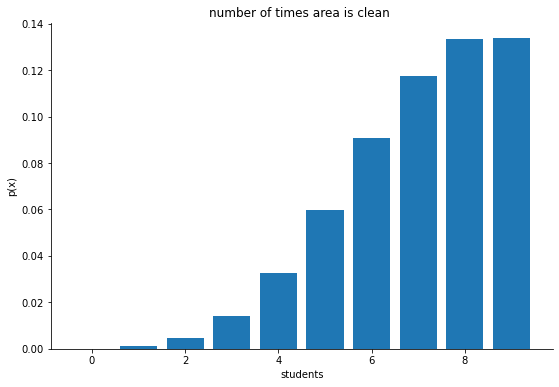

In [105]:
x = np.arange(0,10)
y = stats.binom(trials, p).pmf(x)

plt.bar(x,y)
plt.xlabel('students')
plt.ylabel('p(x)')
plt.title('number of times area is clean ')

In [51]:
# 90 % 0f 3 0f 22 (.9 * 3 *22)
# Trials for 1 day 

trials = 60
p =0.03

stats.binom(60, 0.03).sf(0) # propbability of 1 day 



0.8391933309784234

In [122]:
# probability of getting it not cleaned two days in a row
# two days in a row means we must multiply our trial by 2
success = 0.03
trials = 0.9*3*22 *2
stats.binom(trials, success).pmf(0)

0.026821436301629073

In [123]:

# probability of getting it not cleaned five days in a row
# two days in a row means we must multiply our trial by 5
success = 0.03
trials = 0.9*3*22 *5
stats.binom(trials, success).pmf(0)

0.00011781621791055144

# 6 
You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [ ]:
# convert people to time by multiplying by 2 min 
time_available = 60
mean_time = 15 * 2
sd_time = 3*2
time_to_order = 35 # so that you have 10 minutes to wait for your food, and 15 minutes to eat 


In [124]:

stats.norm(30,6).cdf(35)

0.7976716190363569

In [ ]:
# 7
Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

- What percent of employees earn less than 60,000?
- What percent of employees earn more than 95,000?
- What percent of employees earn between 65,000 and 80,000?
- What do the top 5% of employees make?

In [125]:

from env import host, user, password

In [126]:
def get_db_url(database):
    from env import host, user, password
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

In [129]:
employees = pd.read_sql("SELECT* from employees", get_db_url('employees'))
employees

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [130]:
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [132]:
salary = pd.read_sql("SELECT* from salaries", get_db_url('employees'))
salary 

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25
...,...,...,...,...
2844042,499999,63707,1997-11-30,1998-11-30
2844043,499999,67043,1998-11-30,1999-11-30
2844044,499999,70745,1999-11-30,2000-11-29
2844045,499999,74327,2000-11-29,2001-11-29


In [134]:
salary.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


In [135]:
#average salary
curr_salary = salary[salary.to_date.astype('str') == '9999-01-01']
avg_salary = curr_salary.salary.mean()
avg_salary

72012.23585730705

In [136]:
#std dev
std_dev = salary[salary.to_date.astype('str') == '9999-01-01'].salary.std()
std_dev

17309.99538025198

What percent of employees earn less than 60,000?

In [141]:
mean = 72012
sd = 17310


In [142]:
# percent of employees earn less than 60,000?
(np.random.normal(mean, sd, 100_000) <= 60_000).mean()
''' stats.norm(mean, sd).cdf(60000) * 100 # percentage of employee earning less than or equal to 60000 '''

0.24458

In [143]:
# getting the percentage of employees earning more than 95,000
(np.random.normal(mean, sd, 100_000) > 95_000).mean()

''' stats.norm(mean, sd).sf(95000) * 100 # percentage of employees earning more than 95000  '''

0.09181

In [144]:
#What percent of employees earn between 65,000 and 80,000?

((np.random.normal(mean, sd, 100_000) < 80_000).mean())-((np.random.normal(mean, sd, 100_000) < 65_000).mean())

''' in_between = stats.norm(mean, sd).cdf(80000) - stats.norm(mean,sd).cdf(65000) 
in_between * 100. # percentage of employees earning between 65000 and 80000 '''

0.33418000000000003

In [145]:
#What do the top 5% of employees make?
pd.Series((np.random.normal(mean, sd, 100_000))).quantile(.95)

# 
'''What do the top 5% of employees make?
 stats.norm(mean, sd).isf(.05)'''

100498.4251070191